# Customer Churn Analysis of a Telecom Company

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize


### Load the data

In [10]:
df = pd.read_csv('Customer Churn.csv') # Load the data
df.head() # Display the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info() # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### replacing the empty strings in the TotalCharges column with 0 and convert the column to float because tenure is 0 

In [12]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0) # Replace empty strings with 0
df["TotalCharges"] = df["TotalCharges"].astype(float) # Convert the column to float


In [13]:
df.info() # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum() # Check for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.isnull().sum().sum() # Check for missing values

np.int64(0)

In [16]:
df.describe() # Display the summary statistics

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df.duplicated().sum() # Check for duplicates

np.int64(0)

In [18]:
df["customerID"].duplicated().sum() # Check for duplicates

np.int64(0)

#### converting the SeniorCitizen column to Yes or No

In [19]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
    
    df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [20]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


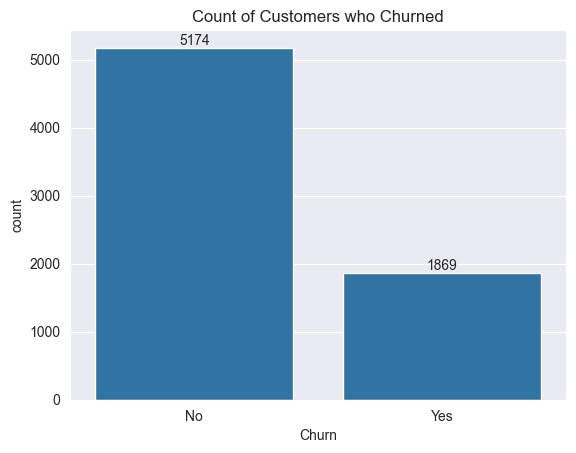

In [21]:
ax= sns.countplot(x = "Churn", data = df) # Display the count of customers who churned

ax.bar_label(ax.containers[0]) # Display the count of customers who churned
plt.title("Count of Customers who Churned") # Set the title of the plot
plt.show()

Text(0.5, 1.0, 'Percentage of Customers who Churned')

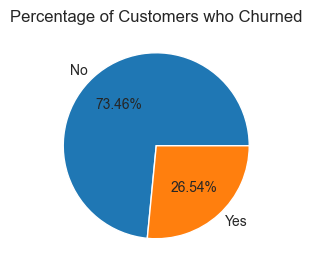

In [22]:
plt.figure(figsize = (3,4)) # Set the size of the plot

gb = df.groupby("Churn").agg({"Churn": "count"}) # Group by the Churn column and count the number of customers who churned

plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%") # Display the pie chart
plt.title("Percentage of Customers who Churned") # Set the title of the plot

from the pie chart above, we can see that 73.46% of the customers churned. Lets explore the data further to see the factors that contributed to the churn


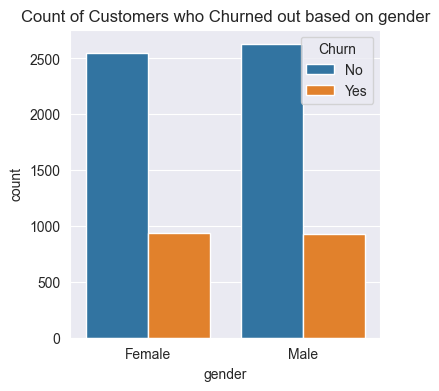

In [23]:
plt.figure(figsize=(4,4)) # Set the size of the plot
sns.countplot(x = "gender", hue = "Churn", data = df) # Display the count of customers who churn
plt.title("Count of Customers who Churned out based on gender") # Set the title of the plot
plt.show()


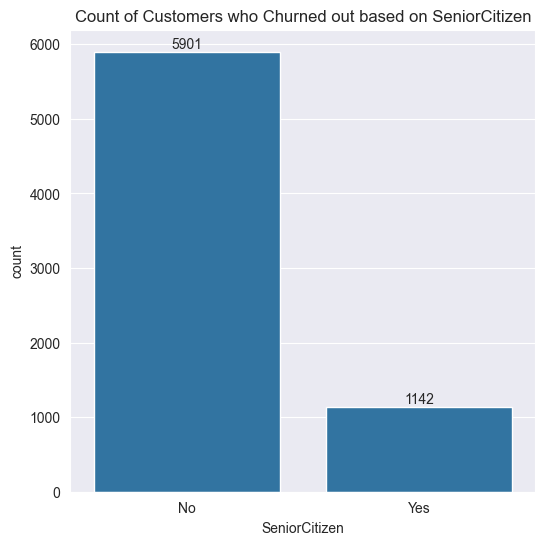

<Figure size 400x300 with 0 Axes>

In [31]:
ax = sns.countplot(x="SeniorCitizen", data=df)  # Display the count of customers who churned based on SeniorCitizen
plt.title("Count of Customers who Churned out based on SeniorCitizen")  # Set the title of the plot

# Add data labels
ax.bar_label(ax.containers[0])  # Display the count of customers who churned based on SeniorCitizen
plt.figure(figsize=(4,3))  # Set the size of the plot

plt.show()

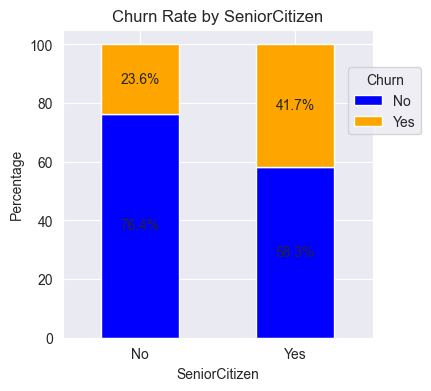

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Customer Churn.csv')

# Ensure the DataFrame is properly defined
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")

# Selected code
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Adjust the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Plot the bar
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'orange'])

# Add percentage labels on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn Rate by SeniorCitizen')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))

plt.show()

comparative a generated percentage of people in senior citizen category have churned

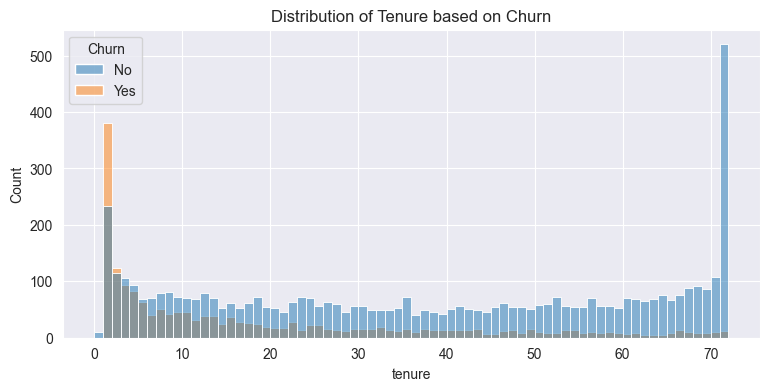

In [45]:
plt.figure(figsize=(9,4)) # Set the size of the plot
sns.histplot(x = "tenure", hue = "Churn", data = df, bins = 72) # Display the histogram of tenure
plt.title("Distribution of Tenure based on Churn") # Set the title of the plot

plt.show()

people who have used the service for a long time have stayed with the company but people who have used the service for a short time have churned

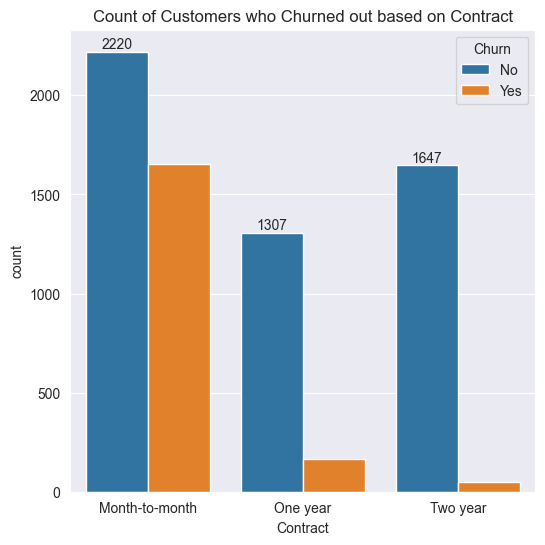

<Figure size 300x300 with 0 Axes>

In [48]:
ax = sns.countplot(x='Contract', data=df, hue='Churn')  # Display the count of customers who churned based on SeniorCitizen
plt.title("Count of Customers who Churned out based on Contract")  # Set the title of the plot

# Add data labels
ax.bar_label(ax.containers[0])  # Display the count of customers who churned based on SeniorCitizen
plt.figure(figsize=(3,3))  # Set the size of the plot

plt.show()

people who have month to month contract have churned more than people who have one year or two year contract

In [49]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

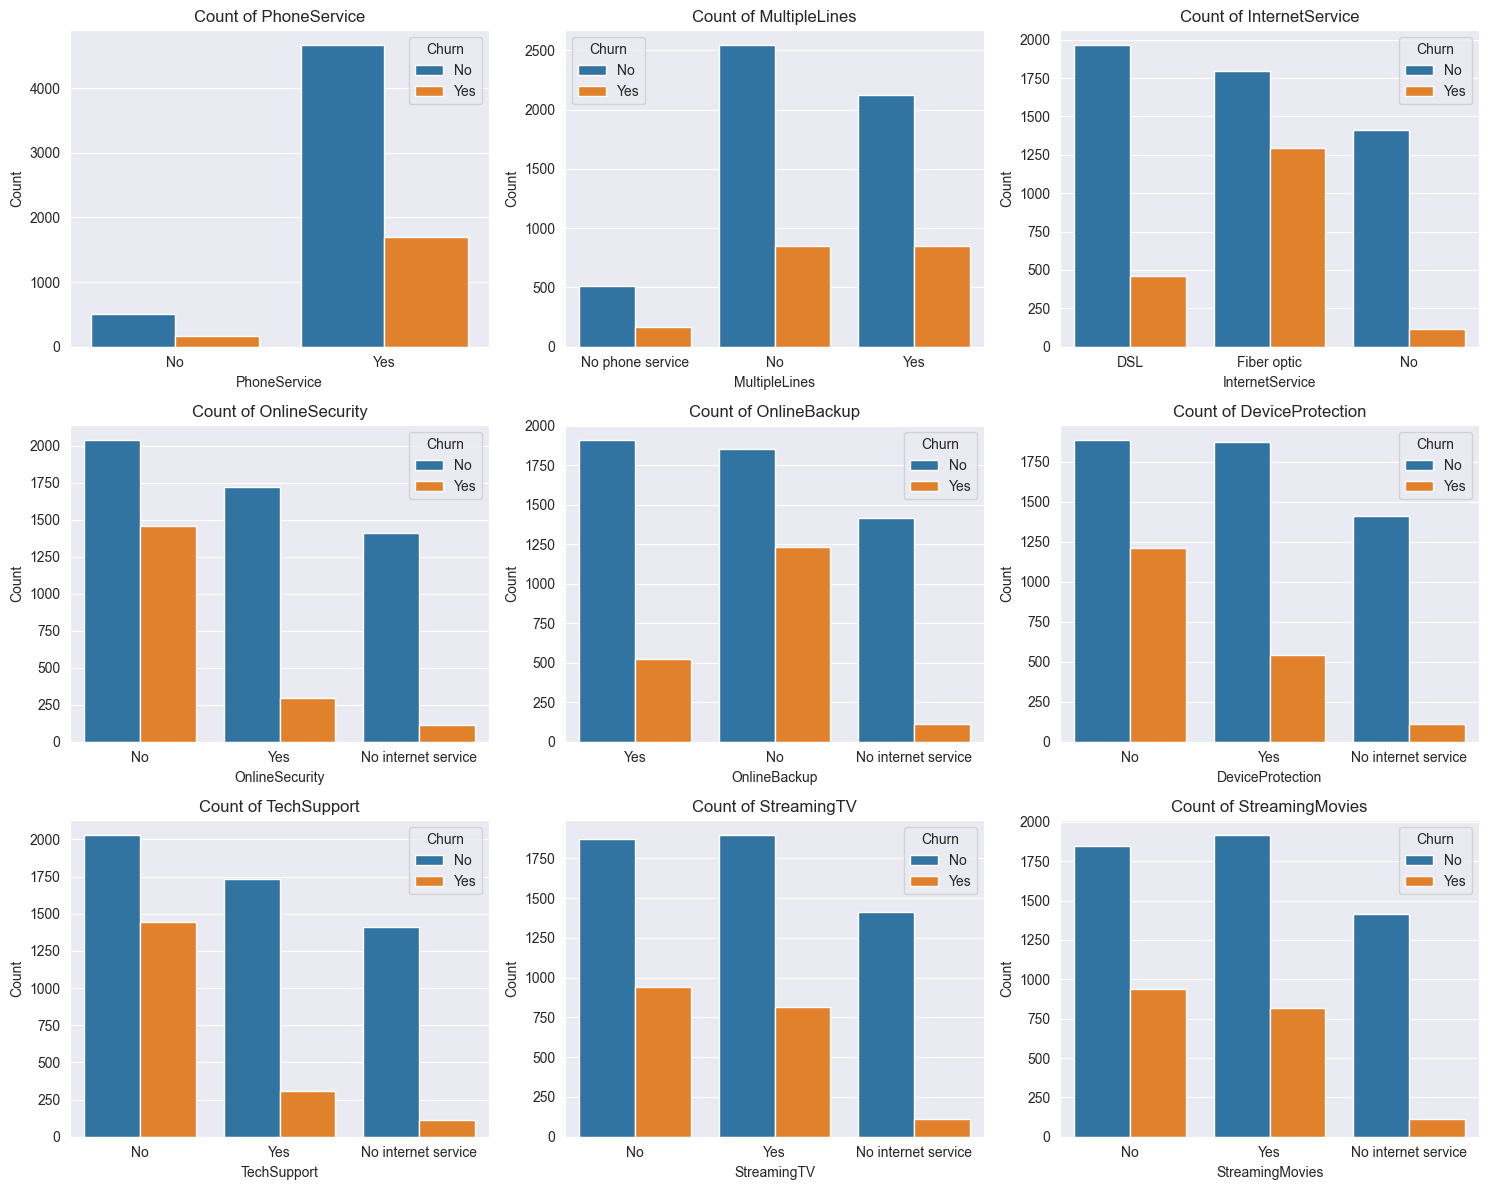

In [56]:

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

axes = axes.flatten() # Convert axes to 1D array

# Plot each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df['Churn'])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

#remove empty subplots if any 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# Adjust layout
plt.tight_layout()
plt.show()

PhoneService and MultipleLines: Customers with multiple lines tend to churn more compared to those with a single line.

InternetService: Customers using Fiber optic internet service have a higher churn rate compared to those using DSL or no internet service.

OnlineSecurity and OnlineBackup: Lack of online security and backup services is associated with higher churn rates.

TechSupport: Customers without tech support are more likely to churn.
Streaming Services: Customers without streaming TV or movies services show a higher tendency to churn.

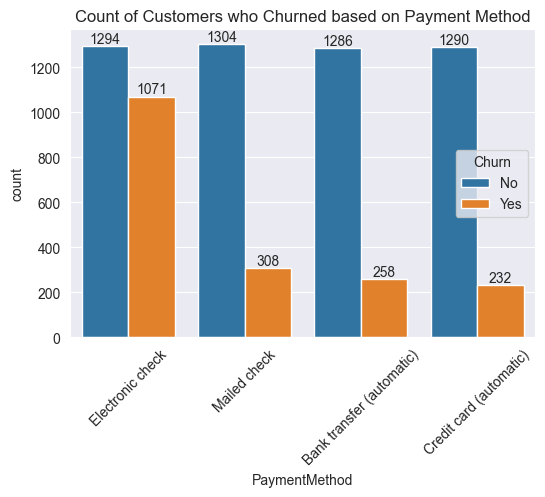

In [57]:
# check customer churn by payment method
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers who Churned based on Payment Method')
plt.xticks(rotation=45)
plt.show()